In [1]:
import time
import os.path
import requests
import pandas as pd

In [ ]:
# install DenMune clustering algorithm using pip command from the offecial Python repository, PyPi
# from https://pypi.org/project/denmune/
!pip install denmune

# now import it
from denmune.denmune import DenMune

In [3]:
dataset = 'pathbased' # let us take Pathbased dataset as an example

url = "https://zerobytes.one/denmune_data/"
file_ext = ".txt"
ground_ext = "-gt"

dataset_url = url + dataset + file_ext
groundtruth_url = url + dataset + ground_ext  + file_ext

data_path = 'data/' # change it to whatever you put your data, set it to ''; so it will retrive from current folder
if  not os.path.isfile(data_path + dataset + file_ext):
    req = requests.get(dataset_url)
    with open(data_path + dataset + file_ext, 'wb') as f:
        f.write(req.content)
        
if  not os.path.isfile(data_path + dataset + ground_ext + file_ext):
    req = requests.get(groundtruth_url)
    with open(data_path + dataset +  ground_ext + file_ext, 'wb') as f:
        f.write(req.content)       

using NGT, Proximity matrix has been calculated  in:  0.0036482810974121094  seconds
Dataset's Groundtruht


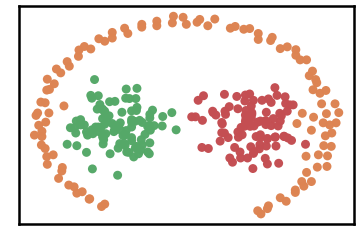



There are 0 outlier point(s) in black (noise of type-1) represent 0% of total points
There are 0 weak point(s) in light grey (noise of type-2) represent 0% of total points
DenMune detected 103 clusters 



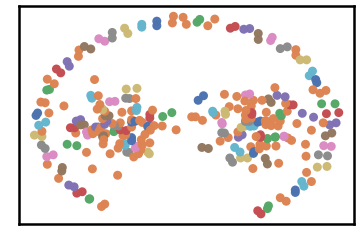

k= 1 :Validity score is: 0.07793880837359099 but best score is 0.07793880837359099 at k= 1     

using NGT, Proximity matrix has been calculated  in:  0.0024232864379882812  seconds
There are 25 outlier point(s) in black (noise of type-1) represent 8% of total points
There are 0 weak point(s) in light grey (noise of type-2) represent 0% of total points
DenMune detected 65 clusters 



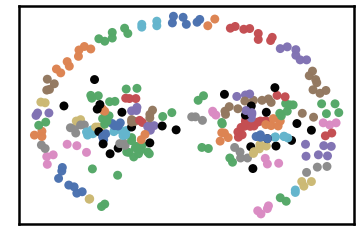

k= 2 :Validity score is: 0.2140221725701736 but best score is 0.2140221725701736 at k= 2     

using NGT, Proximity matrix has been calculated  in:  0.003859281539916992  seconds
There are 7 outlier point(s) in black (noise of type-1) represent 2% of total points
There are 0 weak point(s) in light grey (noise of type-2) represent 0% of total points
DenMune detected 33 clusters 



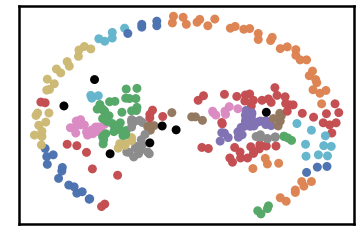

k= 3 :Validity score is: 0.38905812773403325 but best score is 0.38905812773403325 at k= 3     

using NGT, Proximity matrix has been calculated  in:  0.0038967132568359375  seconds
There are 5 outlier point(s) in black (noise of type-1) represent 2% of total points
There are 0 weak point(s) in light grey (noise of type-2) represent 0% of total points
DenMune detected 19 clusters 



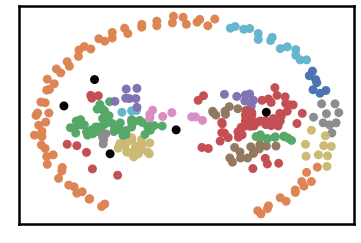

k= 4 :Validity score is: 0.5946664942598677 but best score is 0.5946664942598677 at k= 4     

using NGT, Proximity matrix has been calculated  in:  0.002907991409301758  seconds
There are 2 outlier point(s) in black (noise of type-1) represent 1% of total points
There are 0 weak point(s) in light grey (noise of type-2) represent 0% of total points
DenMune detected 7 clusters 



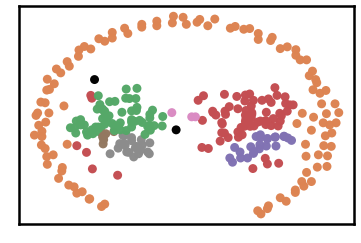

k= 5 :Validity score is: 0.8584971213251468 but best score is 0.8584971213251468 at k= 5     

using NGT, Proximity matrix has been calculated  in:  0.004235029220581055  seconds
There are 1 outlier point(s) in black (noise of type-1) represent 0% of total points
There are 0 weak point(s) in light grey (noise of type-2) represent 0% of total points
DenMune detected 3 clusters 



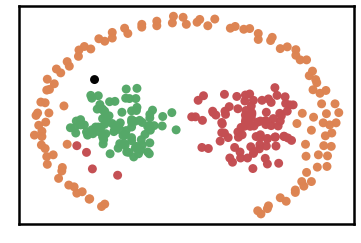

k= 6 :Validity score is: 0.9781764895594682 but best score is 0.9781764895594682 at k= 6     

using NGT, Proximity matrix has been calculated  in:  0.0043163299560546875  seconds
k= 7 :Validity score is: 0.8485152019285412 but best score is 0.9781764895594682 at k= 6     

using NGT, Proximity matrix has been calculated  in:  0.00319671630859375  seconds
k= 8 :Validity score is: 0.9632669749767612 but best score is 0.9781764895594682 at k= 6     

using NGT, Proximity matrix has been calculated  in:  0.0033719539642333984  seconds
k= 9 :Validity score is: 0.9632669749767612 but best score is 0.9781764895594682 at k= 6     

using NGT, Proximity matrix has been calculated  in:  0.0035016536712646484  seconds
k= 10 :Validity score is: 0.8023816299192644 but best score is 0.9781764895594682 at k= 6     

using NGT, Proximity matrix has been calculated  in:  0.004931926727294922  seconds
k= 11 :Validity score is: 0.8040451268515718 but best score is 0.9781764895594682 at k= 6     

using 

<Figure size 432x288 with 0 Axes>

In [4]:
# Denmune's Paramaters
# DenMune(dataset=dataset, k_nearest=n, data_path=data_path, verpose=verpose_mode, show_plot=show_plot, show_noise=show_noise)
verpose_mode = True # view in-depth analysis of time complexity and outlier detection, num of clusters
show_plot = True  # show plots on/off
show_noise = True # show noise and outlier on/off

# loop's parameters
start = 1
step = 1
end=15

# Validity indexes' parameters
validity_val = -1
best_k = 0
best_val = -1

validity_idx = 2 # Acc=1, F1-score=2,  NMI=3, AMI=4, ARI=5,  Homogeneity=6, and Completeness=7
df = pd.DataFrame(columns =['K', 'ACC', 'F1', 'NMI', 'AMI', 'ARI','Homogeneity', 'Completeness', 'Time' ])


for n in range(start, end+1, step):
    start_time = time.time()
    dm = DenMune(dataset=dataset, k_nearest=n, data_path=data_path, verpose=verpose_mode, show_noise=show_noise)
    labels_true, labels_pred = dm.output_Clusters()
    if show_plot == True and n==start:
        # Let us plot the groundtruth of this dataset which is reduced to 2-d using t-SNE
        print ("Dataset\'s Groundtruht")
        dm.plot_clusters(labels_true, ground=True)
        print('\n', "=====" * 20 , '\n')       
               
    end_time = time.time()
    
    validity_indexes = dm.validate_Clusters(labels_true, labels_pred)
    validity_val = validity_indexes[validity_idx]
    validity_indexes[0] = n
    validity_indexes[8] = end_time - start_time
    
    df = df.append(pd.Series(validity_indexes, index=df.columns ), ignore_index=True)
    
    if (best_val < validity_val):
        best_val = validity_val
        best_k = n
        # Let us show results where only an improve in accuracy is detected
        if show_plot:
            dm.plot_clusters(labels_pred, show_noise=show_noise)
    print ('k=' , n, ':Validity score is:', validity_val , 'but best score is', best_val, 'at k=', best_k , end='     ')
            
    if not verpose_mode:
        print('\r', end='')
    else:
        print('\n', "=====" * 20 , '\n')

In [5]:
# It is time to save the results
results_path = 'results/'  # change it to whatever you output results to, set it to ''; so it will output to current folder
para_file = 'denmune'+ '_para_'  + dataset + '.csv'
df.sort_values(by=['F1', 'NMI', 'ARI'] , ascending=False, inplace=True)   
df.to_csv(results_path + para_file, index=False, sep='\t', header=True)

In [6]:
df # it is sorted now and saved

,K,ACC,F1,NMI,AMI,ARI,Homogeneity,Completeness,Time
5,6.0,293.0,0.978176,0.907532,0.906654,0.937889,0.914701,0.900476,0.026675
7,8.0,289.0,0.963267,0.853170,0.852261,0.891123,0.851352,0.854996,0.026871
8,9.0,289.0,0.963267,0.853170,0.852261,0.891123,0.851352,0.854996,0.090540
4,5.0,236.0,0.858497,0.734994,0.729705,0.725052,0.896653,0.622722,0.025232
6,7.0,232.0,0.848515,0.729561,0.726569,0.697346,0.846194,0.641185,0.027742
10,11.0,234.0,0.804045,0.670449,0.667591,0.605782,0.722491,0.625401,0.034402
9,10.0,233.0,0.802382,0.633090,0.628855,0.581756,0.701576,0.576786,0.030532
11,12.0,230.0,0.764747,0.551994,0.547948,0.519166,0.575416,0.530405,0.033807
14,15.0,225.0,0.710292,0.525615,0.522509,0.456914,0.498078,0.556377,0.038644
13,14.0,224.0,0.705399,0.522646,0.519512,0.453254,0.494239,0.554517,0.036335
